This notebook is a part of the Optical Tweezers experiment data anaysis procedure (Sebastian Kalos, Tengiz Ibrayev, March/April 2021). In this part, we are forcing stage motion with a sample of STUCK beads (1.0 or 2.12 microns diameter) along one axis and measuring the QPD sensitivity.

In [2860]:
import numpy as np #load all libraries
import pandas as pd
import matplotlib.pyplot as plt 
import scipy

In [2862]:
xls_file = pd.ExcelFile("QPD_sens_mar15.xlsx") #just load the excel file containing the time-voltahe series

In [2863]:
#each sheet in the excel file contains time-voltage series correspondent to only one laser power
#load each sheet into a data frame
df_150mA = pd.read_excel(xls_file, '150mA')
df_200mA = pd.read_excel(xls_file, '200mA')
df_250mA = pd.read_excel(xls_file, '250mA')
df_300mA = pd.read_excel(xls_file, '300mA')
df_350mA = pd.read_excel(xls_file, '350mA')
df_400mA = pd.read_excel(xls_file, '400mA')
df_450mA = pd.read_excel(xls_file, '450mA')

In [2975]:
#global variables here:
frequency = 20 #Hz - frequency of the stage's oscillation
meas_len = 5 #length of each measurement run (seconds)
time_display_start = 0 #x-axis start of all plots
time_display_stop = 0.022 #x-axis limit for all plots

workbook_name = 'tweezers_data.xlsx' #name of the excel file to write data into
sheet_name = '2micron' #name of excel sheet

picked_power = 150 #mA - in this run, I'm only working with one laser current value (1 sheet from the data workbook)

In [2939]:
n_of_datapoints = len(df_150mA.index)
time = np.arange(0,meas_len,meas_len/n_of_datapoints) #create a new array with time series

In [2940]:
#convert dataframes to numpy arrays
arr_150mA = df_150mA.to_numpy()
arr_200mA = df_200mA.to_numpy()
arr_250mA = df_250mA.to_numpy()
arr_300mA = df_300mA.to_numpy()
arr_350mA = df_350mA.to_numpy()
arr_400mA = df_400mA.to_numpy()
arr_450mA = df_450mA.to_numpy()

In [2976]:
qpd_laser_powers = np.array([150, 200, 250, 300, 350, 400, 450]) #these are the laser "powers" (actually currents) that we used

#these lines just allow me to change one global variable (laser current) so that picking the right sheet is automated
laser_power_index = int(np.where(qpd_laser_powers == picked_power)[0]) 
laser_power_arrays = [arr_150mA, arr_200mA, arr_250mA, arr_300mA, arr_350mA, arr_400mA, arr_450mA]
picked_dev = laser_power_arrays[laser_power_index]

In [2977]:
#extract voltage columns from the np array containing data series from all devices
qpd_x = picked_dev[:,0] #qpd along x-axis
qpd_y = picked_dev[:,1]
qpd_z = picked_dev[:,2]

pos_x = picked_dev[:,3] #voltage data from the strain gauge - along x-axis
pos_y = picked_dev[:,4]

Text(0, 0.5, 'QPD voltage (V)')

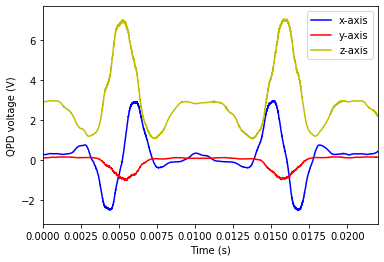

In [2978]:
#plotting the QPD signal here
plt.plot(time, qpd_x, 'b', label='x-axis')
plt.plot(time, qpd_y, 'r', label='y-axis')
plt.plot(time, qpd_z, 'y', label='z-axis')
plt.legend(loc="upper right")
plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time (s)')
plt.ylabel('QPD voltage (V)')

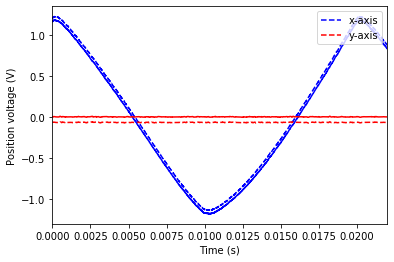

In [2979]:
#plotting the voltage from gauge reader here
plt.plot(time, pos_x, '--b', label='x-axis')
plt.plot(time, pos_y, '--r', label='y-axis')
plt.legend(loc="upper right")
plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time (s)')
plt.ylabel('Position voltage (V)')

#the voltage has an obvious offset - following lines center it on zero pos. voltage
x_offset = max(pos_x)-(max(pos_x)-min(pos_x))/2
pos_x_center = pos_x - x_offset

y_offset = max(pos_y)-(max(pos_y)-min(pos_y))/2
pos_y_center = pos_y - y_offset

#plot again, with the offset corrected
plt.plot(time, pos_x_center, 'b')
plt.plot(time, pos_y_center, 'r')

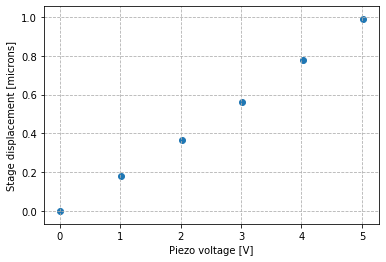

In [2980]:
#now I want to convert pos. voltage to actual displacement:
disp_volt = [0, 1.02, 2.02, 3.02, 4.02, 5.02] #taken manually
disp_microns = [0, 0.179, 0.365, 0.560, 0.778, 0.989] #taken manually (avg. of x, y motion)
plt.scatter(disp_volt, disp_microns)
plt.xlabel('Piezo voltage [V]')
plt.ylabel('Stage displacement [microns]')
plt.grid(linestyle='--')
microns_per_volt,b = np.polyfit(disp_volt, disp_microns, 1) #do a linear fit and find slope

Text(0, 0.5, 'Fixed Bead displacement [microns]')

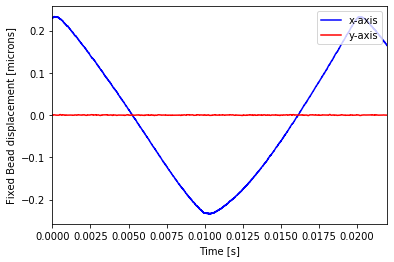

In [2981]:
#translating piezo gauge voltage into actual stage displacement via the slope found in the previous cell
x_displac = pos_x_center*microns_per_volt 
y_displac = pos_y_center*microns_per_volt 

#plot again the same thing, but in microns instead of Volts
plt.plot(time, x_displac, 'b', label='x-axis')
plt.plot(time, y_displac, 'r', label='y-axis')
plt.legend(loc="upper right")
plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time [s]')
plt.ylabel('Fixed Bead displacement [microns]')

In [2982]:
#from now on, only one axis is being studied:
qpd_voltage = qpd_x
displac = x_displac

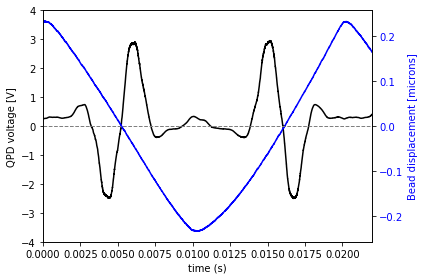

In [2983]:
# plot QPD voltage and fixed bead displacement on the same graph
fig, ax1 = plt.subplots()

#qpd voltage
ax1.set_xlabel('time (s)', color = 'black')
ax1.set_ylabel('QPD voltage [V]', color = 'black')
ax1.plot(time, qpd_voltage, color = 'black')
ax1.tick_params(axis='y')
ax1.set_ylim(-4,4)

#x-displacement
ax2 = ax1.twinx()
ax2.set_ylabel('Bead displacement [microns]', color = 'blue')  # we already handled the x-label with ax1
ax2.plot(time, displac, color = 'blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.xlim(time_display_start,time_display_stop)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.axhline(y=0, linewidth=1, color='grey', linestyle = '--')

plt.show()

In [2985]:
def hysteresis(zero_crossings):
# here I'm cleaning up a bit and defining a function that becomes useful in a moment:

# e.g. in the qpd voltage data, zero crossings are not "clean" - there are multiple time instances (often temporally close to each other) at which the voltage crosses 0 (due to noise). Finding zero-crossings becomes important, however, and I want to avoid duplicates.
# This function takes an array that contains indices of zero-crossings of some signal. I find the periodic pattern and the number of steps it takes to cross zero.
# if the number of time steps is lower than half of the "average", I delete the redundant zero crossing index

    interval_diffs = []
    for i in range(0, len(zero_crossings)-1): #start with second zero-crossing index and find its distance from the previous one
        diff = zero_crossings[i+1] - zero_crossings[i]
        interval_diffs.append(diff) #For each index, store its distance from the previous
    interval_diffs = np.array(interval_diffs)
    avg_diffs = np.average(interval_diffs) #find the "average" width of the signal (it's NOT the average width though, just an orientation number to decide which ones to kick out!)

    indices_to_delete = []
    #scan through the qpd crossing indices again, now knowing what width each pulse should exceed and store the redundant indices 
    for i in range(0, len(zero_crossings)-1):
        diff = zero_crossings[i+1] - zero_crossings[i]
        if diff <= avg_diffs/2:
            indices_to_delete.append(i)

    zero_crossings = np.delete(zero_crossings, indices_to_delete) #delete redundant zero-crossing indices
    return(zero_crossings)

In [2986]:
def find_extrema(voltage_data, time):
# this function takes in a voltage array, time series array and returns arrays containing spikes in the voltage data (maxima, minima),
# as well as indices of zero-crossings (up and down separately), and the total number of extremum points (positive OR negative spikes, whichever is smaller)

    voltage_zero_crossings = np.where(np.diff(np.sign(voltage_data)))[0] #get an array of indices at which a sign change occurs in the voltage signal

    voltage_zero_crossings = hysteresis(voltage_zero_crossings)

    global_max_voltage = max(voltage_data) #overall maximum of voltage signal
    global_min_voltage = min(voltage_data) #overall minimum of voltage signal
        
    maxima = []
    minima = []
    up_indices = []
    down_indices = []

    ## search for one local min and one max starts here
    for i in range(0, len(voltage_zero_crossings)-1):
        crossing_index = voltage_zero_crossings[i] 
        next_crossing = voltage_zero_crossings[i+1]
        previous_crossing = voltage_zero_crossings[i-1]

        local_max_voltage = 0
        local_max_index = 0

        local_min_voltage = 0
        local_min_index = 0

        flag1 = 0
        flag2 = 0

        threshold = 4/5 #this times the global max is the threshold for deciding if a peak is a local max. 

        #find index of local max around zero crossing
        for j in range(previous_crossing+1, next_crossing-1): #scan from last to next
            if voltage_data[j] > local_max_voltage and voltage_data[j] > global_max_voltage * threshold: 
                local_max_voltage = voltage_data[j]
                local_max_index = j
                flag1 = -1

        #find index of local min around zero crossing
        for k in list(reversed(range(previous_crossing+1, next_crossing-1))):
            if voltage_data[k] < local_min_voltage and voltage_data[k] < global_min_voltage * threshold:
                local_min_voltage = voltage_data[k]
                local_min_index = k
                flag2 = -1

        flag = flag1*flag2
        if local_max_voltage > 0:
            if [local_max_index, local_max_voltage] not in maxima:
                maxima.append([local_max_index, local_max_voltage])
        if local_min_voltage < 0:
            if [local_min_index, local_min_voltage] not in minima:
                minima.append([local_min_index, local_min_voltage])

        if flag and local_max_index > crossing_index and local_min_index < crossing_index:
            up_indices.append(crossing_index)
        elif flag and local_max_index < crossing_index and local_min_index > crossing_index:
            down_indices.append(crossing_index)



    if len(minima) < len(maxima):
        n_of_extrema = len(minima)
    else: 
        n_of_extrema = len(maxima)

    return([maxima, minima, up_indices, down_indices, n_of_extrema])

In [2987]:
[qpd_maxima, qpd_minima, qpd_up_indices, qpd_down_indices, qpd_n_of_extrema] = find_extrema(qpd_voltage, time) #call a function to find spikes and zero crossings in QPD signal

Text(0, 0.5, 'QPD output voltage')

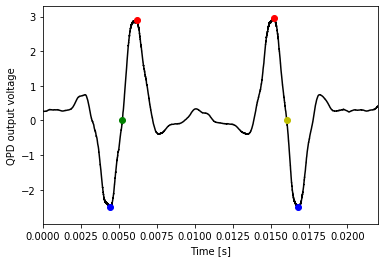

In [2988]:
#plot QPD signal
plt.plot(time, qpd_voltage, 'black')

# I used the previous function to find local minima, maxima and zero-crossings.
# Now I denote these points in the graph as colored points (mostly to check that the algorithm works)
for i in range(len(qpd_up_indices)):
    plt.plot(time[qpd_up_indices[i]], 0, 'o', color='green') #mark relevant zero crossings while voltage rises (GREEN)
for i in range(len(qpd_down_indices)):
    plt.plot(time[qpd_down_indices[i]], 0, 'o', color='y') #mark relevant zero crossings while voltage drops (YELLOW)

for i in range(qpd_n_of_extrema):
    max_ind = int(qpd_maxima[i][0])
    max_qpd = qpd_maxima[i][1]

    min_ind = int(qpd_minima[i][0])
    min_qpd = qpd_minima[i][1]

    plt.plot(time[max_ind], max_qpd, 'o', color='red') #mark local QPD max (RED)
    plt.plot(time[min_ind], min_qpd, 'o', color='blue') #mark local QPD min (RED)

plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time [s]')
plt.ylabel('QPD output voltage')

In [2989]:
#Now I take the upwards and downwards sections individually and do a linear fit for each, averaging them in the end.
def find_qpd_slopes(minima, maxima, n_of_extrema):
    #This function EXPECTS ASSYMETRICAL SHAPE - meaning MIN -> MIN -> MAX -> MAX, etc.
    # Use "find_pos_slopes" on the triangular signal instead
    minima = np.array(minima)
    maxima = np.array(maxima)

    up_slopes = []
    down_slopes = []

    #if the first extremum is a minimum
    if minima[0][0] < maxima[0][0]:
        for i in range(0, n_of_extrema-1, 2):
            rise = maxima[i, 1] - minima[i, 1] 
            run = (maxima[i, 0] - minima[i, 0])*(meas_len/n_of_datapoints)
            up_slope = rise/run
            up_slopes.append(up_slope)

        for i in range(0, n_of_extrema-1, 2):
            rise = minima[i+1, 1] - maxima[i+1, 1] 
            run = (minima[i+1, 0] - maxima[i+1, 0])*(meas_len/n_of_datapoints)
            down_slope = rise/run
            down_slopes.append(down_slope)
        print('starts with minimum')

    #if the first extremum is a maximum
    elif minima[0][0] > maxima[0][0]:
        for i in range(0, n_of_extrema-1, 2):
            rise = maxima[i+1, 1] - minima[i+1, 1] 
            run = (maxima[i+1, 0] - minima[i+1, 0])*(meas_len/n_of_datapoints)
            up_slope = rise/run
            up_slopes.append(up_slope)

        for i in range(0, n_of_extrema-1, 2):
            rise = minima[i, 1] - maxima[i, 1] 
            run = (minima[i, 0] - maxima[i, 0])*(meas_len/n_of_datapoints)
            down_slope = rise/run
            down_slopes.append(down_slope)
        print('starts with maximum')
    return([up_slopes, down_slopes])

In [2990]:
[qpd_up_slopes, qpd_down_slopes] = find_qpd_slopes(qpd_minima, qpd_maxima, qpd_n_of_extrema) #call the function and print whether the first extremum in min or max

starts with minimum


#the previous function returned an array of all slopes (it went over the whole time-voltage series)
#now I want to average them and get a single number

In [2991]:
avg_qpd_up_slope = np.mean(qpd_up_slopes) #volts per second in the linear region
avg_qpd_down_slope = np.mean(qpd_down_slopes) #volts per second in the linear region
print("QPD avg. slope up = ",avg_qpd_up_slope, "volts per second")
print("QPD avg. slope down = ",avg_qpd_down_slope, "volts per second")

QPD avg. slope up =  630.1266331910832 volts per second
QPD avg. slope down =  -678.5805490150401 volts per second


Now I need to do the same with position voltage - using the known time segments in which the qpd data is linear

In [2992]:
#calling a function again to find maxima, minima, zero crossings etc., this time of the stage position (strain gauge) data
[pos_maxima, pos_minima, pos_up_indices, pos_down_indices, pos_n_of_extrema] = find_extrema(displac, time) 

Text(0, 0.5, 'Bead (position stage) displacement [microns]')

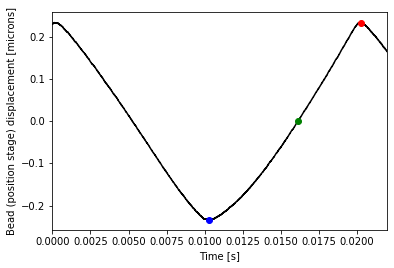

In [2993]:
#plotting displacement of the position stage (here directly in microns already) versus time + pointing out extrema and points of zero crossing when the slope is positive and negative
# This serves as a visual control for the next step - calculating the slope of the triangular wave (AKA speed of the stage)
plt.plot(time, displac, 'black')
for i in range(len(pos_up_indices)):
    plt.plot(time[pos_up_indices[i]], 0, 'o', color='green') #mark relevant zero crossings (GREEN)
for i in range(len(pos_down_indices)):
    plt.plot(time[pos_down_indices[i]], 0, 'o', color='y') #mark relevant zero crossings (Yellow)

for i in range(pos_n_of_extrema):
    pos_max_ind = int(pos_maxima[i][0])
    max_pos = pos_maxima[i][1]

    pos_min_ind = int(pos_minima[i][0])
    min_pos = pos_minima[i][1]

    plt.plot(time[pos_max_ind], max_pos, 'o', color='red') #mark local QPD extreme (RED)
    plt.plot(time[pos_min_ind], min_pos, 'o', color='blue') #mark local QPD extreme (RED)

plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time [s]')
plt.ylabel('Bead (position stage) displacement [microns]')

In [2994]:
def find_pos_slopes(minima, maxima, n_of_extrema):
    #THIS FUNCTION EXPECTS A PERIODIC TRIANGULAR SHAPE!
    #It goes over the whole time-series data of the triangular signal and finds slopes (up and down individually), returns them in an array
    minima = np.array(minima)
    maxima = np.array(maxima)

    up_slopes = []
    down_slopes = []

    #if the first extremum is a minimum
    if minima[0][0] < maxima[0][0]:
        for i in range(0, n_of_extrema-1, 2):
            rise = maxima[i, 1] - minima[i, 1] 
            run = (maxima[i, 0] - minima[i, 0])*(meas_len/n_of_datapoints)
            up_slope = rise/run
            up_slopes.append(up_slope)

        for i in range(0, n_of_extrema-1, 2):
            rise = minima[i+1, 1] - maxima[i, 1] 
            run = (minima[i+1, 0] - maxima[i, 0])*(meas_len/n_of_datapoints)
            down_slope = rise/run
            down_slopes.append(down_slope)
        print('starts with minimum')

    #if the first extremum is a maximum
    elif minima[0][0] > maxima[0][0]:
        for i in range(0, n_of_extrema-1, 2):
            rise = maxima[i+1, 1] - minima[i, 1] 
            run = (maxima[i+1, 0] - minima[i, 0])*(meas_len/n_of_datapoints)
            up_slope = rise/run
            up_slopes.append(up_slope)

        for i in range(0, n_of_extrema-1, 2):
            rise = minima[i, 1] - maxima[i, 1] 
            run = (minima[i, 0] - maxima[i, 0])*(meas_len/n_of_datapoints)
            down_slope = rise/run
            down_slopes.append(down_slope)
        print('starts with maximum')
    return([up_slopes, down_slopes])

In [2995]:
[pos_up_slopes, pos_down_slopes] = find_pos_slopes(pos_minima, pos_maxima, pos_n_of_extrema)

starts with minimum


Here I just find the average of the stage motion slopes again

In [2996]:
microns_per_sec_up = np.mean(pos_up_slopes)
microns_per_sec_down = np.mean(pos_down_slopes)
print(microns_per_sec_up)
print(microns_per_sec_down) #fixed bead velocity [microns/s]

9.412010416088242
-9.244847190518763


Find the qpd sensitivity (up and down separately), average them and print:

In [2997]:
microns_per_V_up = microns_per_sec_up/avg_qpd_up_slope
microns_per_V_down = microns_per_sec_down/avg_qpd_down_slope
print("QPD sensitivity UP   ", microns_per_V_up, " microns per volt")
print("QPD sensitivity DOWN ", microns_per_V_down, " microns per volt")
avg_qpd_sens = np.average([abs(microns_per_V_up), abs(microns_per_V_down)])
print("Average QPD sensitivity ", avg_qpd_sens, "microns per volt")

QPD sensitivity UP    0.014936696721457398  microns per volt
QPD sensitivity DOWN  0.013623802220587759  microns per volt
Average QPD sensitivity  0.014280249471022579 microns per volt


# This is the desired QPD sensitivity!

here I'm creating an excel file that couples the average qpd sensitivity with the picked laser power (for which this whole workbook was run)
It checks for the existence of the file and creates it if false. Then it writes in the data. This way, qpd data can be transferred to further notebooks easily:

In [2998]:

from pathlib import Path
import xlsxwriter
import openpyxl

#check for the file's existence
if Path(workbook_name).is_file(): 
    print ("File exists") #if already exists, let me know
    from openpyxl import load_workbook
    wb = load_workbook(workbook_name)
    if sheet_name in wb.sheetnames: #if the sheet already exists, let me know
        print('sheet ' + sheet_name + ' exists')
    else: 
        wb.create_sheet(sheet_name)
        wb.save(workbook_name)

else: #if the excel file does not exist yet, create it, save it, close it and let me know
    print ("File not exist yet")
    workbook = xlsxwriter.Workbook(workbook_name)
    sheet = workbook.add_worksheet(sheet_name)

    workbook.close() #close and save the workbook
    print ("File exists now")

# python sucks and I can't write into an existing file that easily so I need to do the following:
write_file = openpyxl.load_workbook(workbook_name) #handler for writing into an existing excel file
sheet = write_file.get_sheet_by_name(sheet_name) #get the name of an existing sheet

sheet.cell(row=1, column=1).value = "laser power [mA]"
sheet.cell(row=1, column=2).value = "QPD sensitivity [microns/V]"
sheet.cell(row=1, column=3).value = "trap stiffness [pN/micron]"
sheet.cell(row=1, column=4).value = "kb"

for i in range(len(qpd_laser_powers)): #write the first column - laser powers
        sheet.cell(row=i+2, column=1).value = qpd_laser_powers[i]

power_index = np.where(qpd_laser_powers == picked_power)[0][0] #find the index of the laser power used
sheet.cell(row=power_index+2, column=2).value = avg_qpd_sens #write the average qpd sensitivity value next to the relevant laser power

write_file.save(workbook_name) #save the excel file

File exists
sheet 2micron exists
ipykernel_launcher:29: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
